In [1]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def get_section_results(file, do_print=False):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    Z = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Z.append(v.simple_value)
    if do_print:
        for i, (x, y) in enumerate(zip(X, Y)):
            print('Iteration {:d} | Train steps: {:d} | Return: {} | Eval_AverageReturn: {}' .format(i, int(x), y, z))
    return [i for i in range(len(X))], X, Y, Z

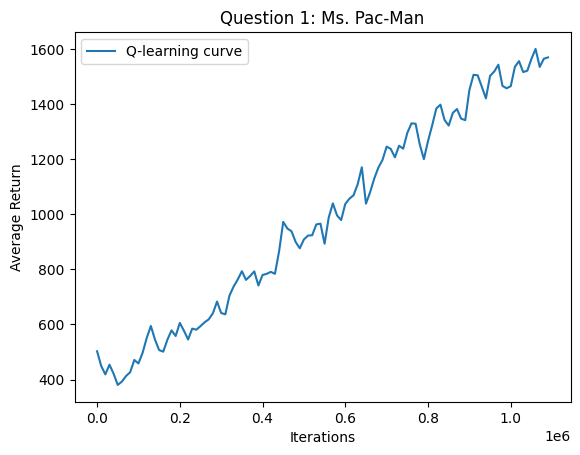

In [4]:
logdir = '../../data/q1_MsPacman-v0_04-10-2022_07-23-08/events*'
eventfile = glob.glob(logdir)[0]
i, X, q1_results, _ = get_section_results(eventfile)

plt.plot(X[:-1], q1_results, label='Q-learning curve')
plt.title("Question 1: Ms. Pac-Man")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

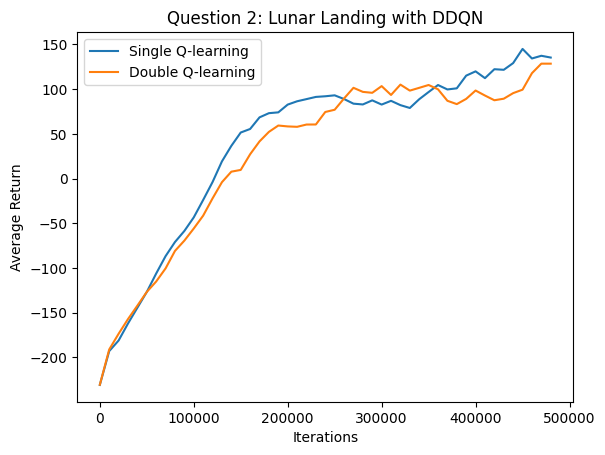

In [8]:
logdir = '../../data/q2_dqn_1_LunarLander-v3_04-10-2022_16-39-14/events*'
eventfile = glob.glob(logdir)[0]
i, _, q2_dqn_1, _ = get_section_results(eventfile)

logdir = '../../data/q2_dqn_2_LunarLander-v3_04-10-2022_17-09-59/events*'
eventfile = glob.glob(logdir)[0]
i, _, q2_dqn_2, _ = get_section_results(eventfile)

logdir = '../../data/q2_dqn_3_LunarLander-v3_04-10-2022_17-42-20/events*'
eventfile = glob.glob(logdir)[0]
i, _, q2_dqn_3, _ = get_section_results(eventfile)

logdir = '../../data/q2_doubledqn_1_LunarLander-v3_04-10-2022_18-15-05/events*'
eventfile = glob.glob(logdir)[0]
i, _, q2_ddqn_1, _ = get_section_results(eventfile)

logdir = '../../data/q2_doubledqn_2_LunarLander-v3_05-10-2022_15-36-35/events*'
eventfile = glob.glob(logdir)[0]
i, _, q2_ddqn_2, _ = get_section_results(eventfile)

logdir = '../../data/q2_doubledqn_3_LunarLander-v3_05-10-2022_16-09-34/events*'
eventfile = glob.glob(logdir)[0]
i, X, q2_ddqn_3, _ = get_section_results(eventfile)

i = i[:-1]

q2_dqn_ave = (np.asarray(q2_dqn_1) + np.asarray(q2_dqn_2) + np.asarray(q2_dqn_3)) / 3.
q2_ddqn_ave = (np.asarray(q2_ddqn_1) + np.asarray(q2_ddqn_2) + np.asarray(q2_ddqn_3)) / 3.

plt.plot(X[:-1], q2_dqn_ave, label='Single Q-learning')
plt.plot(X[:-1], q2_ddqn_ave, label='Double Q-learning')
plt.title("Question 2: Lunar Landing with DDQN")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

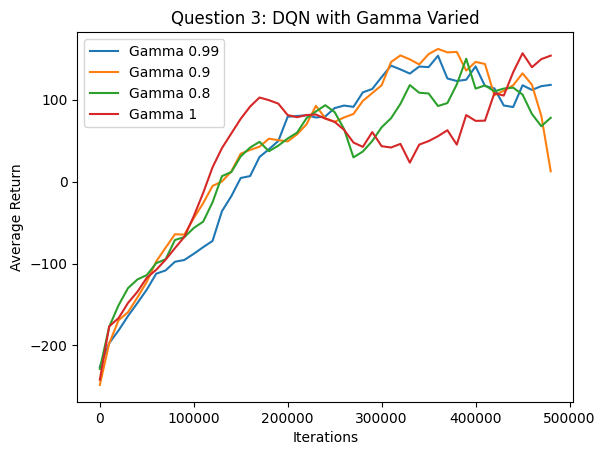

In [9]:
logdir = '../../data/q2_dqn_1_LunarLander-v3_04-10-2022_16-39-14/events*'
eventfile = glob.glob(logdir)[0]
i, _, q3_gamma_1, _ = get_section_results(eventfile)

logdir = '../../data/q3_hparam1_LunarLander-v3_04-10-2022_17-42-20/events*'
eventfile = glob.glob(logdir)[0]
i, _, q3_gamma_0_99, _ = get_section_results(eventfile)

logdir = '../../data/q3_hparam2_LunarLander-v3_05-10-2022_20-41-01/events*'
eventfile = glob.glob(logdir)[0]
i, _, q3_gamma_0_9, _ = get_section_results(eventfile)

logdir = '../../data/q3_hparam3_LunarLander-v3_05-10-2022_21-34-27/events*'
eventfile = glob.glob(logdir)[0]
i, X, q3_gamma_0_8, _ = get_section_results(eventfile)

i = X[:-1]

plt.plot(i, q3_gamma_0_99, label='Gamma 0.99')
plt.plot(i, q3_gamma_0_9, label='Gamma 0.9')
plt.plot(i, q3_gamma_0_8, label='Gamma 0.8')
plt.plot(i, q3_gamma_1, label='Gamma 1')
plt.title("Question 3: DQN with Gamma Varied")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

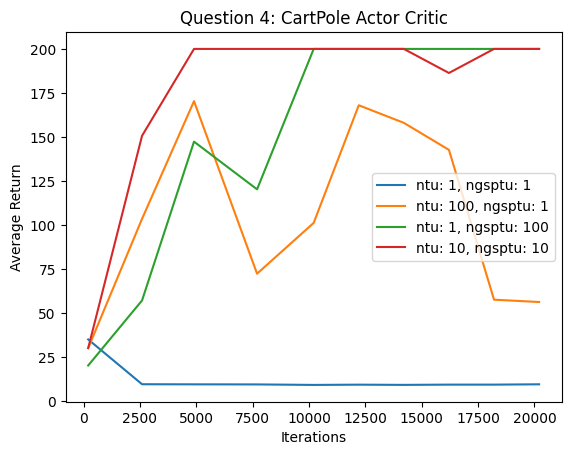

In [10]:
logdir = '../../data/q4_ac_1_1_CartPole-v0_04-10-2022_12-39-36/events*'
eventfile = glob.glob(logdir)[0]
i, _, _, q4_1_1 = get_section_results(eventfile)

logdir = '../../data/q4_100_1_CartPole-v0_04-10-2022_12-46-46/events*'
eventfile = glob.glob(logdir)[0]
i, _, _, q4_100_1 = get_section_results(eventfile)

logdir = '../../data/q4_1_100_CartPole-v0_04-10-2022_12-50-14/events*'
eventfile = glob.glob(logdir)[0]
i, _, _, q4_1_100 = get_section_results(eventfile)

logdir = '../../data/q4_10_10_CartPole-v0_04-10-2022_12-55-04/events*'
eventfile = glob.glob(logdir)[0]
i, X, _, q4_10_10 = get_section_results(eventfile)

plt.plot(X, q4_1_1, label='ntu: 1, ngsptu: 1')
plt.plot(X, q4_100_1, label='ntu: 100, ngsptu: 1')
plt.plot(X, q4_1_100, label='ntu: 1, ngsptu: 100')
plt.plot(X, q4_10_10, label='ntu: 10, ngsptu: 10')
plt.title("Question 4: CartPole Actor Critic")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


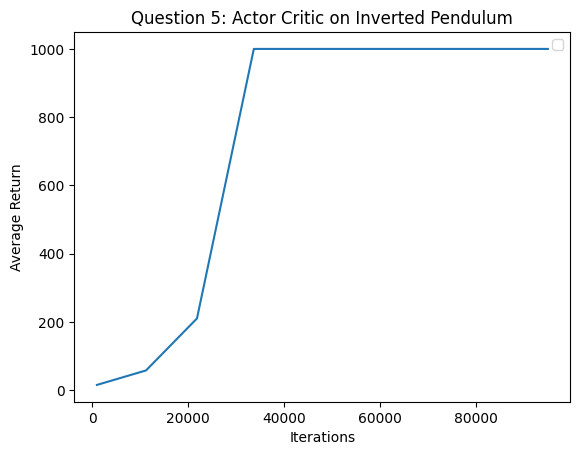

In [11]:
logdir = '../../data/q5_10_10_InvertedPendulum-v4_04-10-2022_13-39-47/events*'
eventfile = glob.glob(logdir)[0]
i, X, _, q5_ac_inv_pendulum = get_section_results(eventfile)

plt.title("Question 5: Actor Critic on Inverted Pendulum")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

plt.plot(X, q5_ac_inv_pendulum, label='Inverted Pendulum')


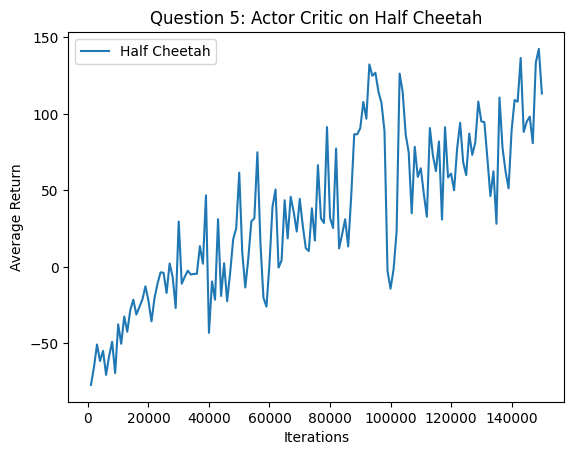

In [13]:
logdir = '../../data/q5_10_10_HalfCheetah-v4_04-10-2022_13-53-55/events*'
eventfile = glob.glob(logdir)[0]
i, X, _, q5_ac_cheetah = get_section_results(eventfile)

plt.plot(X, q5_ac_cheetah, label='Half Cheetah')
plt.title("Question 5: Actor Critic on Half Cheetah")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

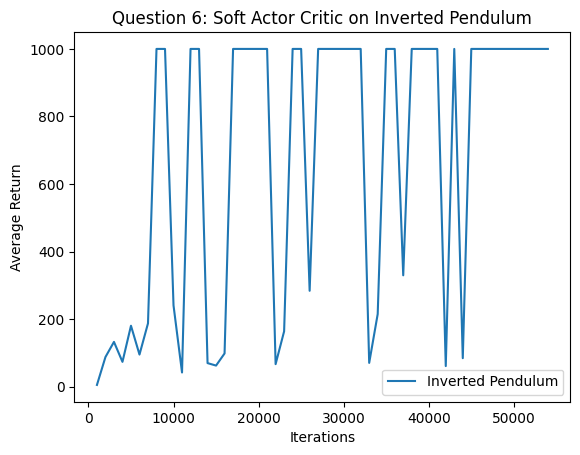

In [16]:
logdir = '../../data/q6a_sac_InvertedPendulum_new_InvertedPendulum-v4_06-10-2022_14-58-52/events*'
eventfile = glob.glob(logdir)[0]
i, X, _, q6_sac_inv_pendulum = get_section_results(eventfile)

plt.plot(X, q6_sac_inv_pendulum, label='Inverted Pendulum')
plt.title("Question 6: Soft Actor Critic on Inverted Pendulum")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


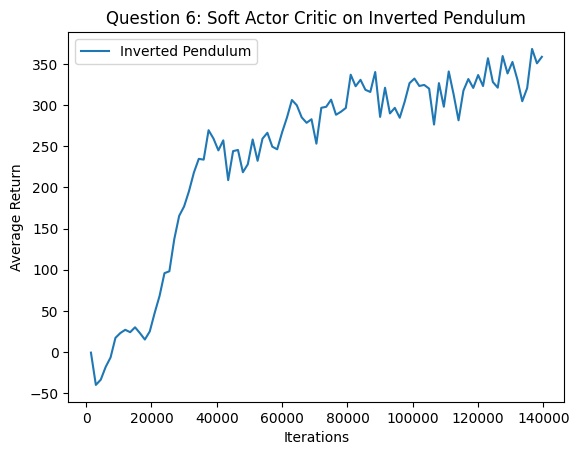

In [2]:
logdir = '../../data/q6b_sac_HalfCheetah_bug_HalfCheetah-v4_19-10-2022_00-15-19/events*'
eventfile = glob.glob(logdir)[0]
i, X, _, q6_sac_half_cheetah = get_section_results(eventfile)

plt.plot(X, q6_sac_half_cheetah, label='Inverted Pendulum')
plt.title("Question 6: Soft Actor Critic on Inverted Pendulum")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()